# q2.a

In [5]:
import numpy as np
import scipy.stats as stats
import scipy.special as special
import matplotlib.pyplot as plt
from itertools import combinations
import random
import struct

rng = np.random.default_rng(seed=22197823)
random.seed(22197823)

In [6]:
def load_files(filenames):
    n = len(filenames)
    data = np.zeros(shape=(n, 40, 40, 40))
    for im_num, filename in enumerate(filenames):
        with open(filename, 'rb') as f:
            # Read the binary data in little-endian format
            file_data = f.read()
            # Convert the binary data to a list of little-endian floats
            floats = list(struct.unpack('<' + 'f' * (len(file_data) // 4), file_data))
        im = np.array(floats).reshape((40,40,40))
        data[im_num] = im
    
    return data

In [7]:
# load all files
filename_CPA_nums = ['04', '05', '06', '07', '08', '09', '10', '11']
filename_PPA_nums = ['03', '06', '09', '10', '13', '14', '15', '16']
filenames_CPA = []
filenames_PPA = []
filenames_mask = ['data/wm_mask.img']
for CPA_num in filename_CPA_nums:
    filenames_CPA.append('data/CPA' + CPA_num + '_diffeo_fa.img')
for PPA_num in filename_PPA_nums:
    filenames_PPA.append('data/PPA' + PPA_num + '_diffeo_fa.img')

data_CPA = load_files(filenames_CPA)
data_PPA = load_files(filenames_PPA)
data_mask = load_files(filenames_mask)[0,:,:,:]

In [8]:
# change voxel data into shape nxm where n is number of samples, and m is number of voxels of interest

# flatten data mask to use as an index on CPA and PPA data. data_mask_flatten is a 1D array
n = data_CPA.shape[0]
data_mask_flatten = data_mask.reshape(-1)

# flatten CPA and PPA data. They are now of shape nxM where M is number of all voxels (40x40x40)
data_CPA_flatten = data_CPA.reshape((n, -1))
data_PPA_flatten = data_PPA.reshape((n, -1))

# only select the voxels of interest to get an array of shape nxm
data_CPA_roi = data_CPA_flatten[:, data_mask_flatten > 0]
data_PPA_roi = data_PPA_flatten[:, data_mask_flatten > 0]

# check that we have selected the correct voxels. Check this by adding all relevant voxels from
# original data array and compare with summing all selected voxels
original_direct_sum = np.einsum('ijkl,jkl->i', data_CPA, data_mask).sum() + np.einsum('ijkl,jkl->i', data_PPA, data_mask).sum()
converted_sum = data_CPA_roi.sum() + data_PPA_roi.sum()
print(f'check the correct roi voxels have been picked. Sum should be zero : {original_direct_sum - converted_sum}')

check the correct roi voxels have been picked. Sum should be zero : 0.0


In [9]:
# Calculate t-statistic for 2 independent samples (CPA vs PPA) on each voxel


NameError: name 't' is not defined

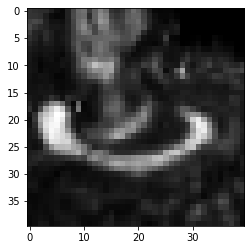

In [10]:
slice = 20
n = 0
plt.imshow(data_CPA[n,:,:,slice], cmap='gray')